<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/courses/ds4b-m2-1-nw/notebooks/s3-nw-2mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similarity and Bipartite Networks with Python and NetworkX
This notebook is an introduction to the concept and syntax around similarity and bipartite networks


In [42]:
# Packaging
import pandas as pd
import seaborn as sns
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_distances

sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

# Adittional dataviz
!pip install nxviz
import nxviz as nv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Similarity networks

Can be constructed by mapping similarity between all observarions.
Here we are going to use cosine distances

In [3]:
# load cars data
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')

In [4]:
data.head()

Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [5]:
# Scale values

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

data_num = scl.fit_transform(data.iloc[:,1:])

In [6]:
# Calculate distances into a square matrix
dist = cosine_distances(data_num,data_num)

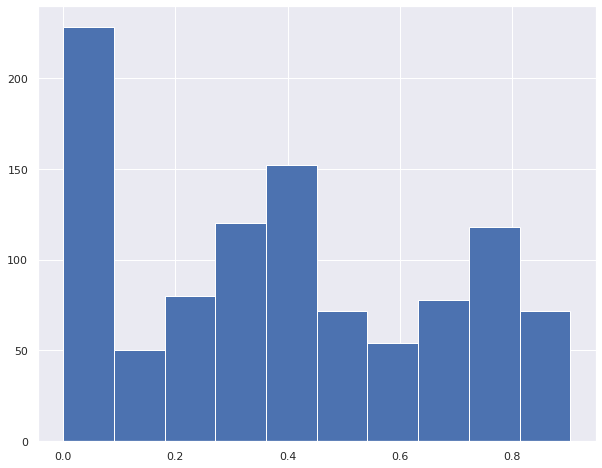

In [7]:
pd.Series(dist.flatten()).hist()

In [8]:
1-dist

array([[1.        , 0.99833341, 0.72651485, ..., 0.94244877, 0.85884684,
        0.75915505],
       [0.99833341, 1.        , 0.73180875, ..., 0.93762875, 0.85467944,
        0.76613321],
       [0.72651485, 0.73180875, 1.        , ..., 0.65012275, 0.49604584,
        0.99155606],
       ...,
       [0.94244877, 0.93762875, 0.65012275, ..., 1.        , 0.9336236 ,
        0.68969623],
       [0.85884684, 0.85467944, 0.49604584, ..., 0.9336236 , 1.        ,
        0.55351352],
       [0.75915505, 0.76613321, 0.99155606, ..., 0.68969623, 0.55351352,
        1.        ]])

In [9]:
# calculate a cutoff (for a less crowded network)
perc = np.percentile(1-dist, 60)

In [10]:
# create NW
G = nx.from_numpy_array(1-dist)

In [11]:
G.remove_edges_from(nx.selfloop_edges(G))

In [12]:
# add names

attributes_dict=data.iloc[:,0].T.to_dict()
nx.set_node_attributes(G, attributes_dict, 'model')

In [14]:
print(nx.info(G))

Graph with 32 nodes and 496 edges


In [15]:
# Get rid of low-weight edges
G_sub = nx.edge_subgraph(G, [(u,v) for u,v,d in G.edges(data=True) if d['weight'] > perc])

In [16]:
print(nx.info(G_sub))

Graph with 32 nodes and 189 edges


In [17]:
# identify communities (optional)
import community as community_louvain

partition = community_louvain.best_partition(G_sub)
nx.set_node_attributes(G_sub, partition, 'partition')

AttributeError: ignored

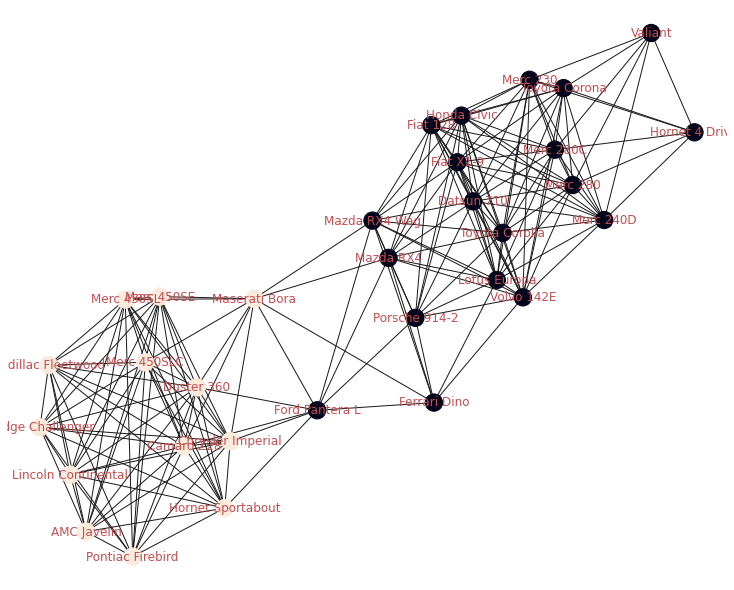

In [ ]:
nx.draw_kamada_kawai(G_sub, 
               node_color=list(partition.values()), 
               with_labels = True, 
               labels=attributes_dict, 
               font_color='r')

In [ ]:
# For visualization
!pip install -U bokeh
!pip install -q holoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
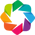

In [ ]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

In [ ]:
graph = hv.Graph.from_networkx(G_sub, nx.layout.fruchterman_reingold_layout).opts(
                                                                        tools=['hover'],
                                                                        #directed=True,
                                                                        edge_alpha=0.2,
                                                                        #node_size='cent_degree',
                                                                        node_color='partition', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

labels = hv.Labels(graph.nodes, ['x', 'y'], 'model')

show(hv.render((graph * labels.opts(text_font_size='8pt', text_color='black', bgcolor='white'))))

# Multi-modal networks


## What's that?
Now its time to talk about an interesting type of networks, multi-modal. This means, a network has several "modes", meaning connects entities on different conceptual levels. The most commone one is a **2-mode** (or **bipartite**) network. 

Examples could be an 

* Author $\rightarrow$ Paper
* Inventor $\rightarrow$ Patent
* Member $\rightarrow$ Club network. 

Here, the elements in the different modes represent different things. In interesting real-life research examples you find 2-mode networks for instance in co-occurence (2 actors mentioned in the same news-article), co-affiliation (2 actors are member of the same association), or co-characteristics (2 actors both like to talk about a certain topic on twitter).

## Network Projections

Two-mode networks are rarely analysed in their original form. Although this is preferable, few methods exist for that purpose. As such, these networks are often transformed into one-mode networks (only one type of nodes) to be analysed. This procedure is often referred to as projection. Projection is done by selecting one of the sets of nodes and linking two nodes from that set if they were connected to the same node (of the other kind).

We can alalyse them in sepperation (and sometimes we should), but often its helpful to *project* them onto one mode. Here, we create a node in one mode by joint association with another mode.

2-mode

![](https://toreopsahl.files.wordpress.com/2009/04/fig1_twomode_half.png)

1-mode

![](https://toreopsahl.files.wordpress.com/2009/04/fig1_twomode_simple.png)

In my field, that often happens with scientometric data such as publications, but also patents or policy reports. Conceptually, we can see them as 2 mode networks, between articles and their reference. 


![](https://www.dropbox.com/s/e4vnq7kh24pyu0t/networks_2mode.png?dl=1)

Particularly in citation networks, we can also use the implicite 2-mode structure of $Publications \rightarrow Citation$

That helps us to apply some interesting metrics, such as:

* direct citations
* Bibliographic coupling
* Co--citations

Interestingly, different projections of this 2-mode network give the whole resulting 1-mode network a different meaning.

![](https://www.dropbox.com/s/f8g8nr83lucvpqx/networks_biblio.png?dl=1)

For an application, check:

* Rakas, M., & Hain, D. S. (2019). The state of innovation system research: What happens beneath the surface?. Research Policy.



## Weighted Network Projection

In a similar spirit as the method used by Newman (2001), it is also possible to discount for the number of nodes when projecting weighted two-mode networks.

 
 For example, it could be argued that if many online users post to a thread, their ties should be weaker than if there were few people posting to the thread. A straight forward generalisation is the following function: $w_{ij} = \sum_p \frac{w_{i,p}}{N_p - 1}$. 
 
 This formula would create a directed one-mode network in which the out-strength of a node is equal to the sum of the weights attached to the ties in the two-mode network that originated from that node. For example, node C has a tie with a weight of 5 in the two-mode network and an out-strength of 5 in the one-mode projection.

![](https://toreopsahl.files.wordpress.com/2009/04/fig1_twomode_forum_newman2001.png)

* Newman, M. E. J., 2001. Scientific collaboration networks. II. Shortest paths, weighted networks, and centrality. Physical Review E 64, 016132.

In [18]:
people = ['Jesper', 'Pernille', 'Morten', 'Lise', 'Christian', 'Mette', 'Casper', 'Dorte', 'Jacob', 'Helle']
places = ['Yoga House', 'Crossfit', 'Jazz Club', 'Jomfru Anne Gade']

In [19]:
# some more imports that will be useful
from networkx.algorithms import bipartite
import itertools
import random

In [30]:
# Creating a random bipartite network of people and places
combinations = list(itertools.product(people, places))
connections = random.sample(combinations, 15)

In [21]:
c0 = set([c[0] for c in connections])
c1 = set([c[1] for c in connections])

In [22]:
B = nx.Graph()

In [23]:
# add nodes and edges in their modes
B.add_nodes_from(c0, bipartite=0)
B.add_nodes_from(c1, bipartite=1)
B.add_edges_from(connections)

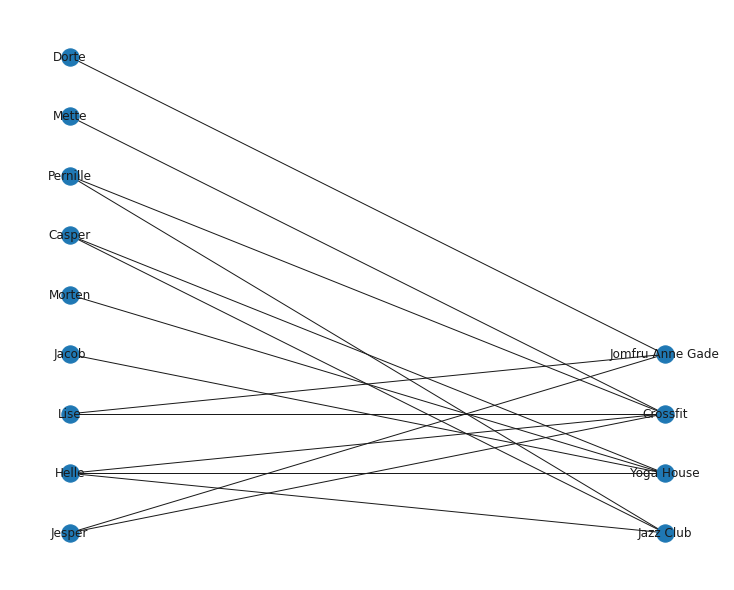

In [24]:
# very clunky visualization of 2-mode networks (unfortunately)
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos, with_labels=True)
plt.show()

In [25]:
# projecting onto people
B_people = bipartite.weighted_projected_graph(B, c0)

In [26]:
# projecting onto places
B_places = bipartite.weighted_projected_graph(B, c1)

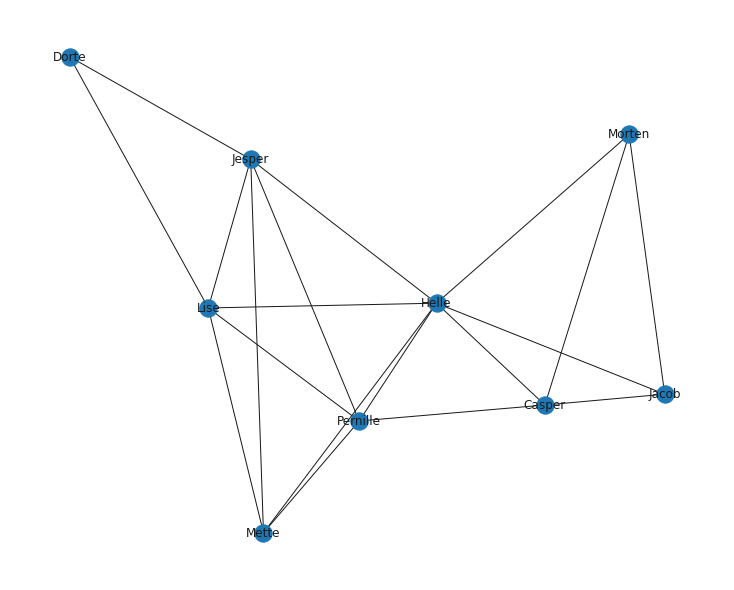

In [27]:
nx.draw(B_people, with_labels=True)

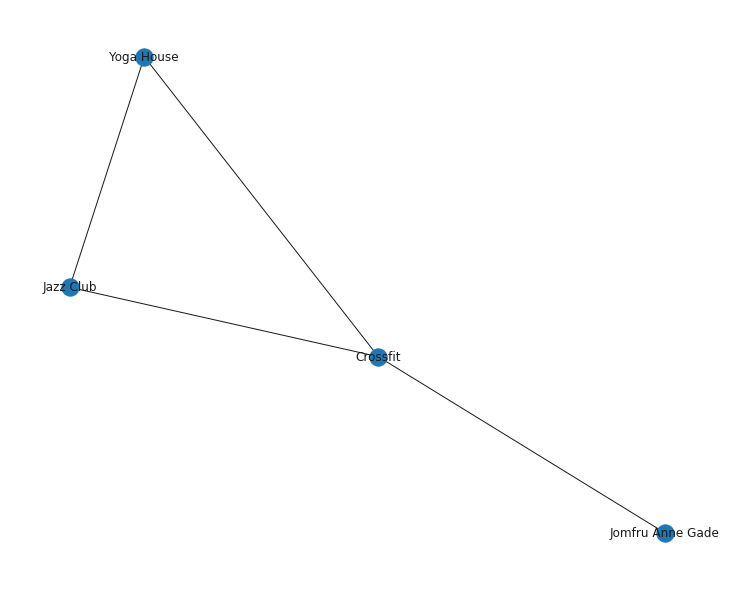

In [28]:
nx.draw(B_places, with_labels=True)

In [ ]:
# pull edges
edges_df = nx.to_pandas_edgelist(B)

In [ ]:
edges_df

source            target
0   Christian          Crossfit
1        Lise  Jomfru Anne Gade
2        Lise         Jazz Club
3      Casper          Crossfit
4      Casper        Yoga House
5      Casper         Jazz Club
6       Helle        Yoga House
7       Helle          Crossfit
8      Morten          Crossfit
9       Mette          Crossfit
10   Pernille          Crossfit
11   Pernille  Jomfru Anne Gade
12     Jesper        Yoga House
13      Dorte         Jazz Club
14      Dorte        Yoga House

In [ ]:
# create matrix from edges
adj_df = pd.crosstab(edges_df.source, edges_df.target)

In [ ]:
adj_df

target     Crossfit  Jazz Club  Jomfru Anne Gade  Yoga House
source                                                      
Casper            1          1                 0           1
Christian         1          0                 0           0
Dorte             0          1                 0           1
Helle             1          0                 0           1
Jesper            0          0                 0           1
Lise              0          1                 1           0
Mette             1          0                 0           0
Morten            1          0                 0           0
Pernille          1          0                 1           0

In [ ]:
# Projecting with dot-product as alternative
pd.DataFrame(np.dot(adj_df, adj_df.T), index=adj_df.index, columns=adj_df.index)

source     Casper  Christian  Dorte  Helle  ...  Lise  Mette  Morten  Pernille
source                                      ...                               
Casper          3          1      2      2  ...     1      1       1         1
Christian       1          1      0      1  ...     0      1       1         1
Dorte           2          0      2      1  ...     1      0       0         0
Helle           2          1      1      2  ...     0      1       1         1
Jesper          1          0      1      1  ...     0      0       0         0
Lise            1          0      1      0  ...     2      0       0         1
Mette           1          1      0      1  ...     0      1       1         1
Morten          1          1      0      1  ...     0      1       1         1
Pernille        1          1      0      1  ...     1      1       1         2

[9 rows x 9 columns]

In [ ]:
nx.to_pandas_adjacency(B_people)

Christian  Lise  Casper  Helle  ...  Mette  Pernille  Jesper  Dorte
Christian        0.0   0.0     1.0    1.0  ...    1.0       1.0     0.0    0.0
Lise             0.0   0.0     1.0    0.0  ...    0.0       1.0     0.0    1.0
Casper           1.0   1.0     0.0    2.0  ...    1.0       1.0     1.0    2.0
Helle            1.0   0.0     2.0    0.0  ...    1.0       1.0     1.0    1.0
Morten           1.0   0.0     1.0    1.0  ...    1.0       1.0     0.0    0.0
Mette            1.0   0.0     1.0    1.0  ...    0.0       1.0     0.0    0.0
Pernille         1.0   1.0     1.0    1.0  ...    1.0       0.0     0.0    0.0
Jesper           0.0   0.0     1.0    1.0  ...    0.0       0.0     0.0    1.0
Dorte            0.0   1.0     2.0    1.0  ...    0.0       0.0     1.0    0.0

[9 rows x 9 columns]

# Stuff

In [ ]:
# select name and IDs
data_select = data[['NAME', 'PERSON_ID', 'AFFILIATION_ID']]

We can create an edge dataframe utilising a "trick" where we merge the dataframe with itself using `AFFILIATION_ID` as key. The only thing that we then need to remove are self-links since a person can not really be in a board with itself.

The initial dataframe has ~60 rows. The new after the merger ~160k. That looks promising.

# Crime networks

In [35]:
curr_path = "https://raw.githubusercontent.com/ericmjl/nxviz/master/examples/datasets/"

In [44]:
df = pd.read_csv(
    curr_path + "/moreno_crime/out.moreno_crime_crime",
    sep=" ",
    skiprows=2,
    header=None,
    )

df = df[[0, 1]]
df.columns = ["personID", "crimeID"]
df.index += 1

# Read in the role metadata
roles = pd.read_csv(
    curr_path + "/moreno_crime/rel.moreno_crime_crime.person.role",
    header=None,
    )

roles.columns = ["roles"]
roles.index += 1

In [48]:
df.head()

personID  crimeID
1         1        1
2         1        2
3         1        3
4         1        4
5         2        5

In [45]:
# Add the edge data to the graph.
G = nx.Graph()
for r, d in df.join(roles).iterrows():
  pid = "p{0}".format(d["personID"])  # pid stands for "Person I.D."
  cid = "c{0}".format(d["crimeID"])  # cid stands for "Crime I.D."
  G.add_node(pid, bipartite="person")
  G.add_node(cid, bipartite="crime")
  G.add_edge(pid, cid, role=d["roles"])    

In [47]:
# Read in the gender metadata
gender = pd.read_csv(
    curr_path + "/moreno_crime/ent.moreno_crime_crime.person.sex",
    header=None,
    )

gender.index += 1
for n, gender_code in gender.iterrows():
  nodeid = "p{0}".format(n)
  G.nodes[nodeid]["gender"] = gender_code[0]

In [50]:
# Annotate each node with connectivity score
for n in G.nodes():
    dcs = nx.degree_centrality(G)
    G.nodes[n]["connectivity"] = dcs[n]

/usr/local/lib/python3.7/dist-packages/nxviz/api.py:276: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  "As of nxviz 0.7, the object-oriented API is being deprecated "


TypeError: ignored

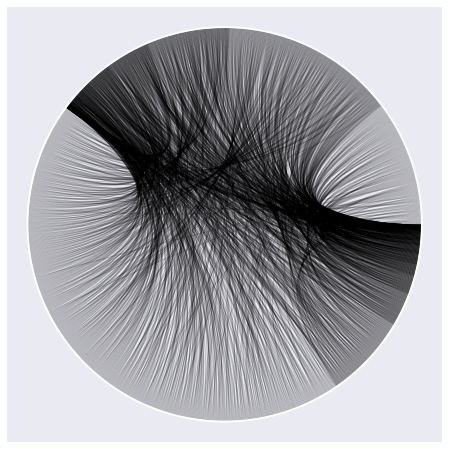

In [55]:
# Make a CircosPlot of the bipartite graph
c = nv.CircosPlot(
    G,
    node_grouping="bipartite",
    node_order="connectivity",
    node_color="bipartite",
)
c.draw()

/usr/local/lib/python3.7/dist-packages/nxviz/api.py:276: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  "As of nxviz 0.7, the object-oriented API is being deprecated "


TypeError: ignored

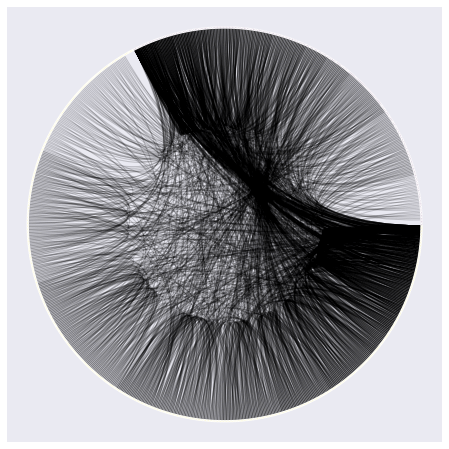

In [58]:
# Make the "people" projection of the bipartite graph.
person_nodes = [n for n in G.nodes() if G.nodes[n]["bipartite"] == "person"]
pG = nx.bipartite.projection.projected_graph(G, person_nodes)

for n in pG.nodes():
    dcs = nx.degree_centrality(pG)
    pG.nodes[n]["connectivity"] = dcs[n]

c = nv.CircosPlot(
    pG, node_grouping="gender", node_order="connectivity", node_color="gender"
)
c.draw()
plt.show()